<h1 style="color:blue; font-size:40px; text-align:center;"> SkillCraft Techonology</h1>
<h2 style="color:red; font-size:30px; text-align:center;"> Task 2</h2

# Importing Files

In [1]:
import pandas as pd

In [3]:
train_df=pd.read_csv(r"C:\Users\Lenovo\Documents\titanic\train.csv")
test_df=pd.read_csv(r"C:\Users\Lenovo\Documents\titanic\test.csv")
submission_df=pd.read_csv(r"C:\Users\Lenovo\Documents\titanic\gender_submission.csv")

In [4]:
# Display basic information about the training dataset
train_df.info(), train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(None,
    PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450  

Data Overview:
891 rows and 12 columns in the training dataset.

Missing values in:

Age (714 non-null, meaning 177 missing values).

Cabin (204 non-null, meaning a large number of missing values).

Embarked (889 non-null, meaning 2 missing values).

In [5]:
# Checking for duplicate entries
duplicate_count = train_df.duplicated().sum()

# Checking missing values
missing_values = train_df.isnull().sum()

duplicate_count, missing_values

(0,
 PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64)

Data Cleaning:
No duplicate entries in the dataset.

Missing values:

Age: 177 missing values.

Cabin: 687 missing values (most of the data is missing).

Embarked: 2 missing values.

Next Steps:
1. Handle missing values:

    Impute Age with the median.

    Drop the Cabin column due to excessive missing values.

    Fill missing Embarked values with the most frequent category.
    

2. Perform EDA to explore relationships between variables. 

In [6]:
# Impute missing Age values with the median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Drop the Cabin column due to excessive missing values
train_df.drop(columns=['Cabin'], inplace=True)

# Fill missing Embarked values with the most frequent category
most_frequent_embarked = train_df['Embarked'].mode()[0]
train_df['Embarked'].fillna(most_frequent_embarked, inplace=True)

# Verify that missing values are handled
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

All missing values have been handled. Now, I'll perform exploratory data analysis (EDA) to uncover relationships and trends in the dataset. Let's start by analyzing survival rates across different categories. 

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12800\3546097808.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=train_df, ci=None, palette="pastel")


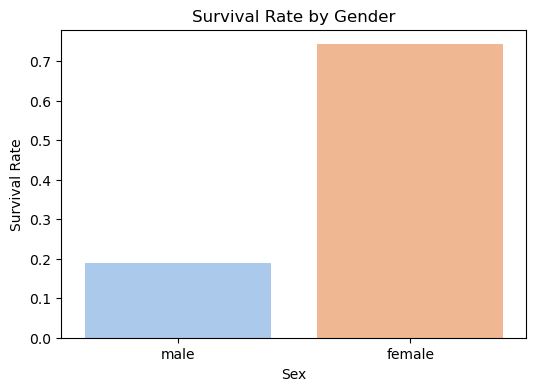

In [8]:
plt.figure(figsize=(6, 4))
sns.barplot(x="Sex", y="Survived", data=train_df, ci=None, palette="pastel")
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12800\1584094428.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=train_df, ci=None, palette="pastel")


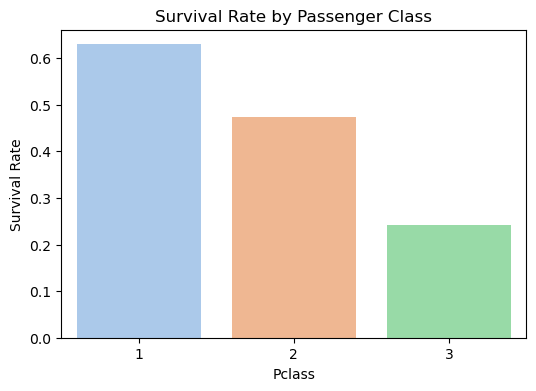

In [9]:
plt.figure(figsize=(6, 4))
sns.barplot(x="Pclass", y="Survived", data=train_df, ci=None, palette="pastel")
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12800\3994884855.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Embarked", y="Survived", data=train_df, ci=None, palette="pastel")


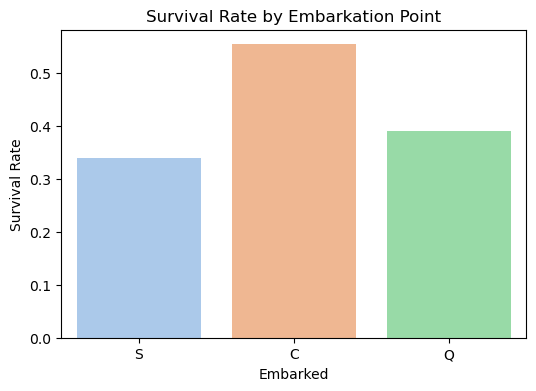

In [10]:
plt.figure(figsize=(6, 4))
sns.barplot(x="Embarked", y="Survived", data=train_df, ci=None, palette="pastel")
plt.title("Survival Rate by Embarkation Point")
plt.ylabel("Survival Rate")
plt.show()

In [12]:
print("Test Dataset Info:")
print(test_df.info())

print("\nTest Dataset Sample:")
print(test_df.head())

print("\nSubmission Dataset Info:")
print(submission_df.info())

print("\nSubmission Dataset Sample:")
print(submission_df.head())

# Compare distributions of key features
print("\nComparison of Pclass Distribution:")
print(train_df['Pclass'].value_counts(normalize=True))
print(test_df['Pclass'].value_counts(normalize=True))

print("\nComparison of Sex Distribution:")
print(train_df['Sex'].value_counts(normalize=True))
print(test_df['Sex'].value_counts(normalize=True))

print("\nComparison of Missing Values:")
print(test_df.isnull().sum())

# Check predicted survival rate in submission file
print("\nPredicted Survival Rate in Submission:")
print(submission_df['Survived'].value_counts(normalize=True))


Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None

Test Dataset Sample:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   


<h1 style="font-size:50px;">Exploratory Data Analysis(EDA)</h1>

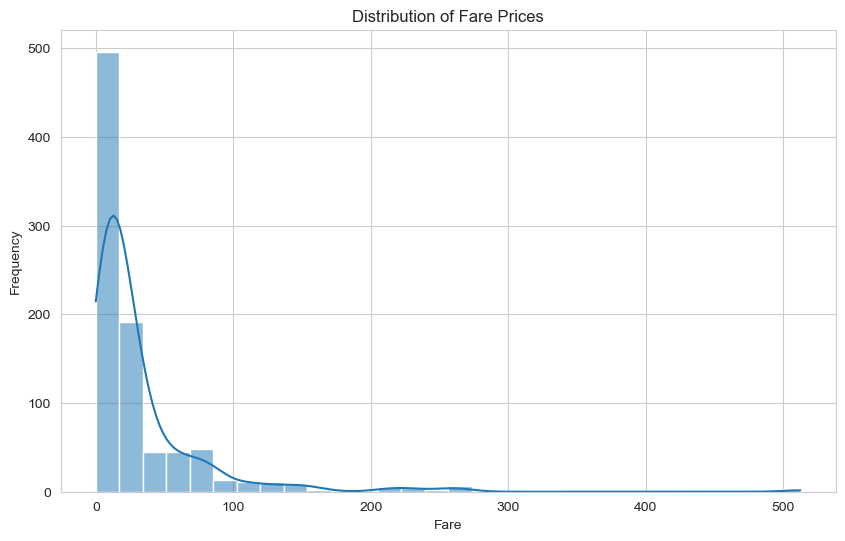

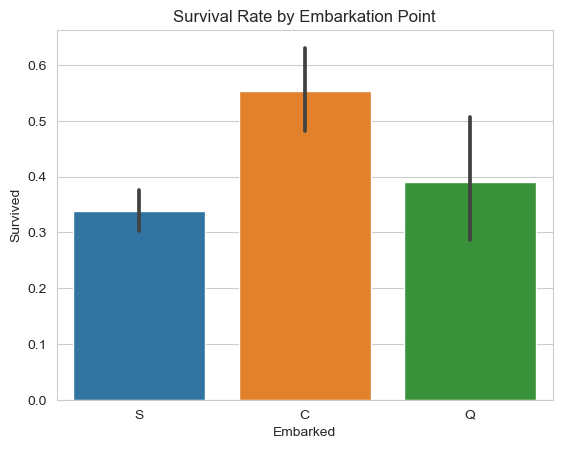

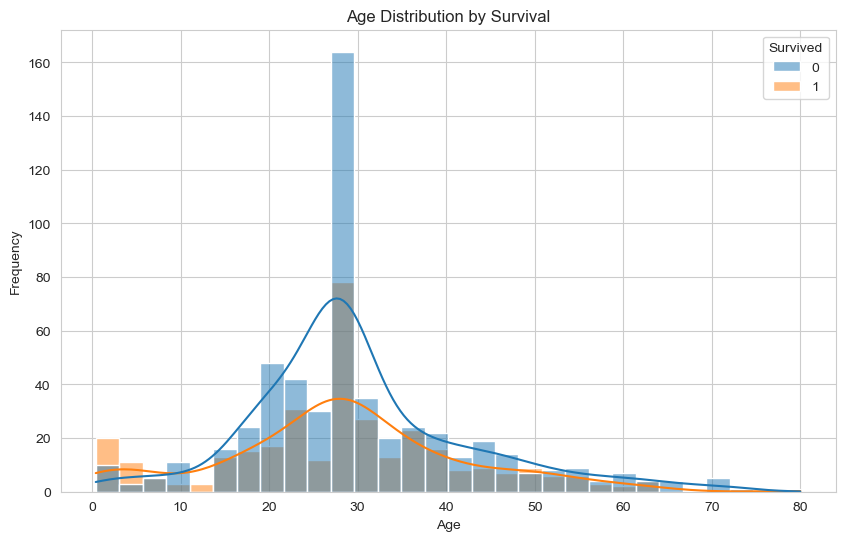

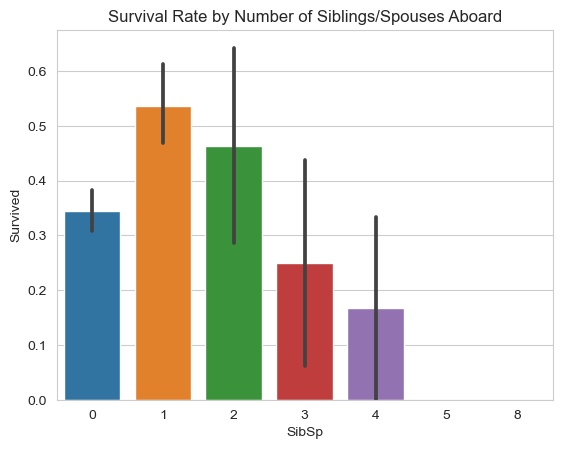

In [18]:
# Additional Graphs
# 1. Distribution of Fare Prices
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Fare'], bins=30, kde=True)
plt.title('Distribution of Fare Prices')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# 2. Survival Rate by Embarkation Point
sns.barplot(x='Embarked', y='Survived', data=train_df)
plt.title('Survival Rate by Embarkation Point')
plt.show()

# 3. Age Distribution by Survival
plt.figure(figsize=(10, 6))
sns.histplot(train_df, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 4. Survival Rate by Number of Siblings/Spouses Aboard
sns.barplot(x='SibSp', y='Survived', data=train_df)
plt.title('Survival Rate by Number of Siblings/Spouses Aboard')
plt.show()


<h1 style="font-size:50px;">Exploring Relationships</h1>

## Relationships Between the Tables:

train.csv: Contains labeled data with survival outcomes (Survived column). Includes passenger details like Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, and Embarked.

test.csv: Similar to train.csv but lacks the Survived column. This is the dataset used for making survival predictions.

gender_submission.csv: Provides a basic survival prediction for the test.csv passengers based on gender.

## Key Relationships:
PassengerId links all three datasets.

train.csv is used to train models, and test.csv is the dataset to predict survival outcomes.

gender_submission.csv serves as a baseline prediction for test.csv, assuming all females survived and all males did not.

Missing values in train data:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Missing values in test data:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived_x       0
Survived_y       0
dtype: int64


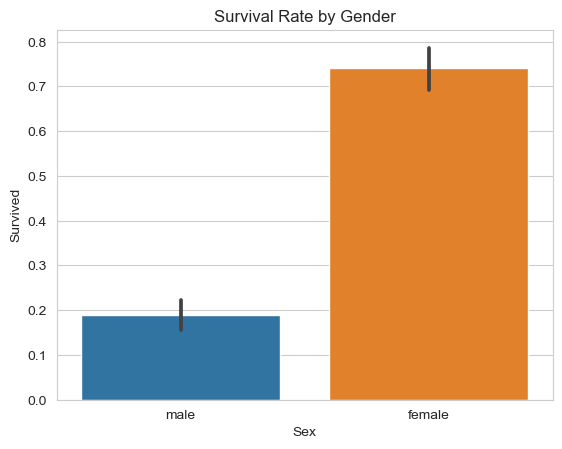

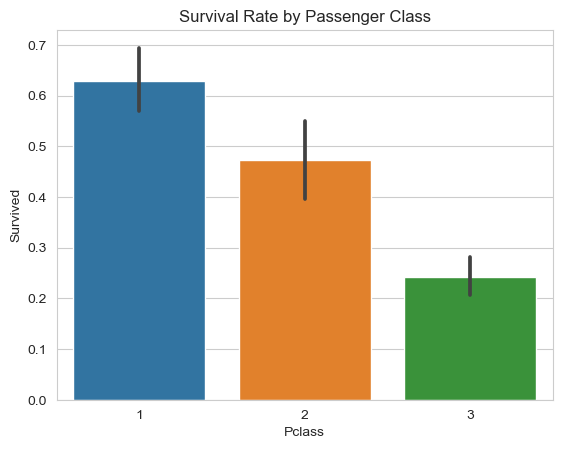

Combined dataset overview:
<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1223 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Embarked     1309 non-null   object 
 10  Cabin        91 non-null     object 
 11  Survived_x   418 non-null    float64
 12  Survived_y   418 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 143.2+ KB
None


In [15]:
# Merge test set with gender submission
test_df = test_df.merge(submission_df, on='PassengerId', how='left')

# Check for missing values
print("Missing values in train data:")
print(train_df.isnull().sum())
print("\nMissing values in test data:")
print(test_df.isnull().sum())

# Check survival rate by gender
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Gender')
plt.show()

# Check survival rate by class
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Passenger Class')
plt.show()



# Merge train and test data for relationship exploration
combined_df = pd.concat([train_df.drop(columns=['Survived']), test_df], axis=0)
print("Combined dataset overview:")
print(combined_df.info())

This script explores relationships in the Titanic dataset by:

Merging test.csv with gender_submission.csv

Checking missing values

Visualizing survival rates by gender and passenger class

Combining train.csv and test.csv for further analysis

#                                       Thank You